In [32]:
# automatically reload the package when it is modified
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from mtr.models import model as model_utils
from mtr.config import cfg, cfg_from_list, cfg_from_yaml_file, log_config_to_file
from mtr.datasets.waymo.waymo_dataset import WaymoDataset
from tools.mtr_env import BatchMTREnv
from tools.mtr_inference import MTRInference
import numpy as np
import torch
import matplotlib.pyplot as plt


cfg_file = 'tools/cfgs/waymo/bc+10_percent_data.yaml'
ckpt_path = 'output/bc/epoch=2-step=4602.ckpt'
cfg = cfg_from_yaml_file(cfg_file, cfg)

dataset = WaymoDataset(cfg.DATA_CONFIG, training=False)
mtr_inference = MTRInference(cfg_file)
# mtr_inference.load_from_checkpoint(ckpt_path)
mtr_inference.load_from_params('model/checkpoint_epoch_30.pth')
mtr_inference.model.eval()
env = BatchMTREnv(1, dataset)


=========== MTR Inference ===========
==> Loading parameters from checkpoint model/checkpoint_epoch_30.pth to GPU
==> Checkpoint trained from version: none
The number of disk ckpt keys: 842
Missing keys: ['motion_decoder.motion_ctrl_head.0.weight', 'motion_decoder.motion_ctrl_head.1.weight', 'motion_decoder.motion_ctrl_head.1.bias', 'motion_decoder.motion_ctrl_head.1.running_mean', 'motion_decoder.motion_ctrl_head.1.running_var', 'motion_decoder.motion_ctrl_head.3.weight', 'motion_decoder.motion_ctrl_head.4.weight', 'motion_decoder.motion_ctrl_head.4.bias', 'motion_decoder.motion_ctrl_head.4.running_mean', 'motion_decoder.motion_ctrl_head.4.running_var', 'motion_decoder.motion_ctrl_head.6.weight', 'motion_decoder.motion_ctrl_head.7.weight', 'motion_decoder.motion_ctrl_head.7.bias', 'motion_decoder.motion_ctrl_head.7.running_mean', 'motion_decoder.motion_ctrl_head.7.running_var', 'motion_decoder.motion_ctrl_head.9.weight', 'motion_decoder.motion_ctrl_head.9.bias']
The number of missing 

[ 0 10 13 22]
[array([ 0, 10, 13, 22])]


([<Figure size 800x800 with 2 Axes>],
 [<AxesSubplot: title={'center': 'Scene fe0b6b106889ba56 at 1.0 seconds'}>])

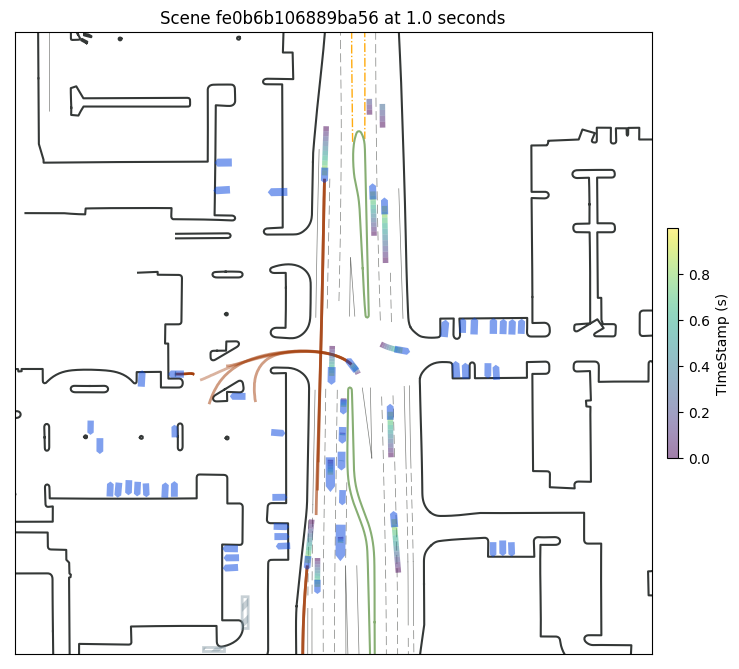

In [34]:
# env.envs_list[0].reset(847)
env.reset()
batch_scene_data = env.batch_scene_data
with torch.no_grad():
    batch_pred_dicts = mtr_inference.inference(batch_scene_data)
env.visualize(batch_dict= batch_pred_dicts)